<a href="https://colab.research.google.com/github/sofol-bit/LinSofoNEUR265/blob/main/notebooks/Pandas_02_12_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

In this notebook, we'll encounter another package for scientific computing in Python: Pandas.

**At the end of this notebook, you'll be able to:**

* Create & manipulate Pandas dataframes

## Importing packages

Before we can use pandas, we need to import it. We can also nickname modules when we import them.

The convention is to import `pandas` as `pd`.

In [53]:
# Import pandas here!

import pandas as pd

# Use whos 'magic command' to see available modules
%whos

Variable     Type         Data/Info
-----------------------------------
ISI_counts   Series       ISI\n13.0    8\n44.0    5<...> Length: 66, dtype: int64
cell_types   DataFrame        Marker        ISI\n0 <...>n\n[140 rows x 2 columns]
pd           module       <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
pvalb_isi    DataFrame        Marker   ISI\n64   Pv<...>\n\n[76 rows x 2 columns]
url          str          https://raw.githubusercon<...>s/main/data/patch_seq.csv


Pandas is a useful module that creates **dataframes** (think of these like Excel spreadsheets, but much faster!).

We can think of Pandas as \"numpy with labels\".

### Benefits of Pandas

* Great for real-world, heterogeneous data
* Similar to Excel spreadsheets (but way faster!)
* Smartly deals with missing data

We can work with our Allen Brain Institute patch-seq data as a Pandas dataframe!

><b>Task:</b> Import the `patch_seq.csv` file from our GitHub repo in the Code cell below! Assign it to a Pandas dataframe called `cell_types`.





In [54]:
# Import the patch-seq dataset!
url='https://raw.githubusercontent.com/hallockh/neur_265_spring2026/refs/heads/main/data/patch_seq.csv'
cell_types = pd.read_csv(url)

## Selecting columns and rows

Indexing in Pandas  works slightly different. Similar to a dictionary, we can index values by their names.

* Use `df['index']` for columns

In [55]:
# Grab the column with the 'ISI' header

cell_types['ISI']


,ISI
0,77.337143
1,44.145000
2,7.840000
3,73.090000
4,63.513333
...,...
135,10.762273
136,18.110588
137,10.169565
138,12.216667


To get the first 5 rows of a dataframe, we can use a slice: `df[:5]`.

This is a great way to get a sense for what kind of information is in the dataframe

><b>Task:</b> Look at the first five rows of your `cell_types` dataframe below:

In [56]:
# Your code here
cell_types[:5]

,Marker,ISI
0,Sst,77.337143
1,Sst,44.145000
2,Sst,7.840000
3,Sst,73.090000
4,Sst,63.513333


We can combine our code to get the first five rows of a specific column like so:

In [57]:
cell_types[:5]['ISI']

,ISI
0,77.337143
1,44.145000
2,7.840000
3,73.090000
4,63.513333


In [58]:
cell_types['ISI'][:5]

,ISI
0,77.337143
1,44.145000
2,7.840000
3,73.090000
4,63.513333


><b>Task:</b> Try flipping the order of your column and row indices. Does Pandas still execute the command?

What's the most common ISI value? This is a really easy question to answer! There's a `.value_counts()` method that we can use (we'll have to round our values before we do this):

In [59]:
# Get ISI counts

cell_types['ISI'] = round(cell_types['ISI'])
ISI_counts = cell_types['ISI'].value_counts()
ISI_counts

,count
ISI,
13.0,8
44.0,5
25.0,5
8.0,5
7.0,4
...,...
26.0,1
29.0,1
32.0,1


We can visualize this with a bar graph by using the `.plot` method:

<Axes: xlabel='ISI'>

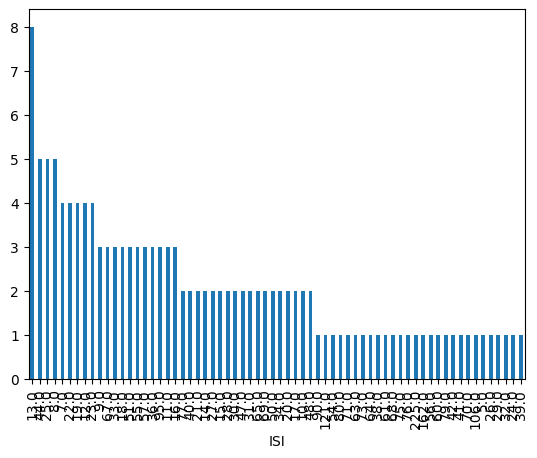

In [60]:
# Bar graph of ISI counts

ISI_counts.plot(kind = 'bar')

><b>Task:</b> Go to the Pandas website (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) and look at other options for the `kind` parameter in the `.plot` method. Try plotting your ISI counts using different types of graphs.

<Axes: ylabel='Frequency'>

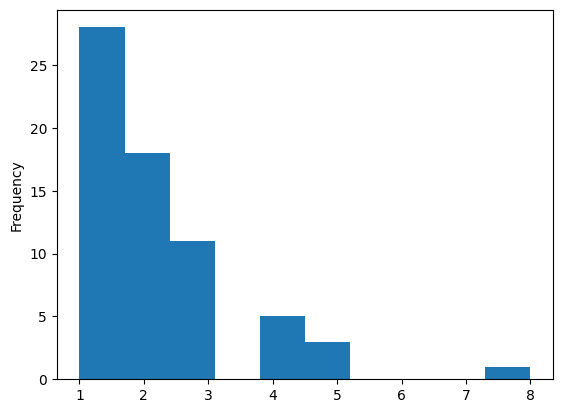

In [61]:
# Plot your ISI value counts here!
ISI_counts.plot(kind = 'hist')

<Axes: ylabel='count'>

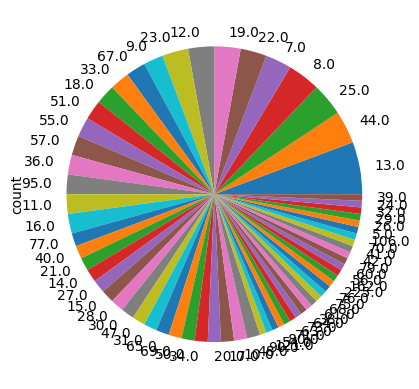

In [62]:
ISI_counts.plot(kind = 'pie')

<Axes: xlabel='ISI'>

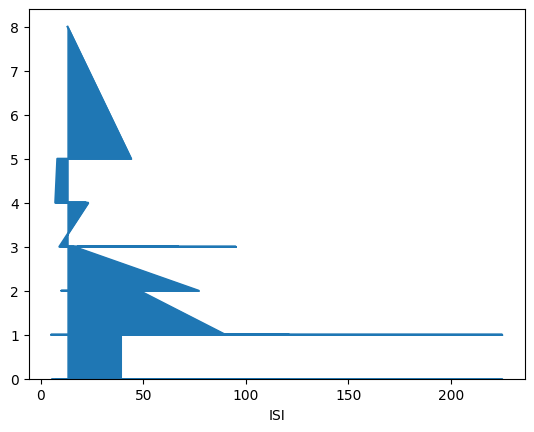

In [63]:
ISI_counts.plot(kind = 'area')

><b>Task:</b> Make a pie chart of the values in your `'Marker'` column. Do you have an equal sampling of parvalbumin and somatostatin-expressing interneurons? (*Hint*: use the `'value_counts()'` method!)

<Axes: ylabel='count'>

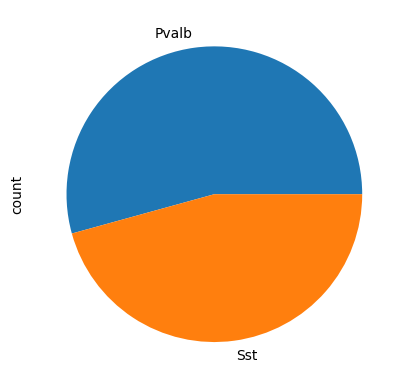

In [67]:

Marker_counts = cell_types['Marker'].value_counts()
Marker_counts.plot(kind='pie')

What if we only want to get ISI value counts from parvalbumin-expressing neurons? To do this, we'd need some way of indexing rows that contain the `'Pvalb'` string. The Pandas syntax for this is:

In [65]:
# Get ISI values from only parvalbumin interneurons

pvalb_isi = cell_types[cell_types['Marker'] == "Pvalb"]
pvalb_isi[:3]

,Marker,ISI
64,Pvalb,22.0
65,Pvalb,9.0
66,Pvalb,19.0


If you look at `pvalb_isi`, you'll see that this worked, and it only contains ISI values from one type of neuron. But how does this work? Let's deconstruct it into two pieces

In [66]:
cell_types['Marker'] == "Pvalb"

,Marker
0,False
1,False
2,False
3,False
4,False
...,...
135,True
136,True
137,True
138,True


This is a big array of `Trues` and `Falses`, one for each row in our dataframe. When we index our dataframe with this array, we get just the rows where our boolean array evaluated to `True`. It's important to note that for row filtering by a boolean array the length of our dataframe's index must be the same length as the boolean array used for filtering.

>Question: What do you notice about the equals signs in the above code? Why do you think are there two types of equals signs?

single: assigning
double: finding/are things equal

## Pandas methods and attributes

Just like with Numpy, Pandas also has some unique attributes and methods you can use to work with your data

* The `.shape` method lets you check the shape of your DataFrame
* The `.append` method lets you add data to your DataFrame
* The `.drop_duplicates` method will remove duplicate data


In [68]:
# Check the shape of your cell_types DataFrame
cell_types.shape

(140, 2)

>Question: What happens when you try to use parentheses with `.shape`? Why do you think this happens?
attributes: describe, methods:do somethings

In [75]:
cell_types.shape()

TypeError: 'tuple' object is not callable

><b>Task:</b> Create a new variable called `cell_temp`, and make it equal to `cell_types` with duplicates removed. What is the shape of `cell_temp`? What is its size?

In [81]:
# Your code here!
cell_temp=cell_types.drop_duplicates()
cell_temp.shape
cell_temp.size


154

Finally, one really useful Pandas method is `.describe`. Try it out on your `cell_types` DataFrame and see what it returns.

In [82]:
# Your code here!
cell_types.describe()

,ISI
count,140.000000
mean,38.435714
std,31.254401
min,5.000000
25%,16.000000
50%,29.500000
75%,55.000000
max,225.000000


><b>Task:</b> Use the `.describe` method on *just* your `'marker'` column, using the syntax `df['column'].describe()`

In [85]:
cell_types['Marker'].describe()

,Marker
count,140
unique,2
top,Pvalb
freq,76


## Indexing DataFrames

Up until now we've focused on some basic summaries of our data. Below are the other methods of slicing, selecting, and extracting you'll need to use constantly.

It's important to note that, although many methods are the same, DataFrames and Series have different attributes, so you'll need be sure to know which type you are working with or else you will receive attribute errors.

Let's look at working with columns first.

You already saw how to extract a column using square brackets like this:

In [86]:
ISI_col = cell_types['ISI']

type(ISI_col)

pandas.core.series.Series

This will return a Series. To extract a column as a DataFrame, you need to pass a list of column names. In our case that's just a single column:

In [87]:
ISI_col = cell_types[['ISI']]

type(ISI_col)

pandas.core.frame.DataFrame

For rows, we have two options:

* `.loc` - **loc**ates by name
* `.iloc`- **loc**ates by numerical **i**ndex

Our rows aren't indexed by name (rows still correspond to numbered indices in our DataFrame), so we can use numbers for each method:

In [88]:
print(cell_types.loc[0])
print(cell_types.iloc[0])

Marker     Sst
ISI       77.0
Name: 0, dtype: object
Marker     Sst
ISI       77.0
Name: 0, dtype: object


`.loc` and `.iloc` can be thought of as similar to Python list slicing. To show this even further, let's select multiple rows.

How would you do it with a list? In Python, just slice with brackets like `example_list[1:4]`. It's works the same way in Pandas:

In [89]:
print(cell_types.loc[1:4])
print(cell_types.iloc[1:4])

  Marker   ISI
1    Sst  44.0
2    Sst   8.0
3    Sst  73.0
4    Sst  64.0
  Marker   ISI
1    Sst  44.0
2    Sst   8.0
3    Sst  73.0


>Question: Do you notice any differences in output between `.loc` and `.iloc` when slicing rows?
including 0 etc, labels vs numeric index

To access a value in a specific row and a specific column, you can use `.iloc[row,column]`:

In [90]:
cell_types.iloc[0,1]

np.float64(77.0)

You can also use Booleans to filter your DataFrame. We already did one example of this in this notebook - we filtered only rows that contain the string `'Pvalb'` out of our DataFrame with the syntax `df[df['column name'] == "value"]`. We can use other comparison operators to accomplish the same goal. A list of Boolean comparison operators in Python is below:

| Operation | Meaning |
|:---------:|:-------:|
|   <       |strictly less than|
| <=      | less than or equal|
|   >     |strictly greater than|
|  >=   |greater than or equal|
|  ==  |equal|
| !=  |not equal|



><b>Task:</b> Create a new variable that contains ISI values greater than or equal to 5. Create a new variable that contains ISI values less than or equal to 7. Create a new variable that contains ISI values that are not equal to 10.

In [100]:
isi_five=cell_types[cell_types['ISI']>=5]
isi_seven=cell_types[cell_types['ISI']<=7]
isi_ten=cell_types[cell_types['ISI']!=10]

print(isi_five)


    Marker   ISI
0      Sst  77.0
1      Sst  44.0
2      Sst   8.0
3      Sst  73.0
4      Sst  64.0
..     ...   ...
135  Pvalb  11.0
136  Pvalb  18.0
137  Pvalb  10.0
138  Pvalb  12.0
139  Pvalb  23.0

[140 rows x 2 columns]


In [101]:
print(isi_seven)

    Marker  ISI
72   Pvalb  7.0
76   Pvalb  7.0
91   Pvalb  5.0
129  Pvalb  7.0
130  Pvalb  7.0


In [102]:
print(isi_ten)

    Marker   ISI
0      Sst  77.0
1      Sst  44.0
2      Sst   8.0
3      Sst  73.0
4      Sst  64.0
..     ...   ...
134  Pvalb  20.0
135  Pvalb  11.0
136  Pvalb  18.0
138  Pvalb  12.0
139  Pvalb  23.0

[138 rows x 2 columns]


We can make some richer conditionals by using logical operators `|` for "or" and `&` for "and".

In [91]:
types_temp = cell_types[(cell_types['Marker'] == "Pvalb") & (cell_types['ISI'] > 4)]
print(types_temp)

    Marker   ISI
64   Pvalb  22.0
65   Pvalb   9.0
66   Pvalb  19.0
67   Pvalb  13.0
68   Pvalb   8.0
..     ...   ...
135  Pvalb  11.0
136  Pvalb  18.0
137  Pvalb  10.0
138  Pvalb  12.0
139  Pvalb  23.0

[76 rows x 2 columns]


><b>Task:</b> Create a new DataFrame with the following attributes:

* Must only contain ISI values from somatostatin interneurons
* ISI values must be less than 2, **or** greater than 8
* Verify that you did this correctly by creating a second DataFrame that contains ISI values from your first DataFrame that are greater than 2, **or** less than 8

In [109]:
multi_SST = cell_types[(cell_types['Marker'] == "Sst") & ((cell_types['ISI'] < 2) & (cell_types['ISI'] > 8))]
print(multi_SST)


Empty DataFrame
Columns: [Marker, ISI]
Index: []


In [110]:
multi=cell_types[(cell_types['ISI']<2)| (cell_types['ISI']>8)]
print(multi)

    Marker   ISI
0      Sst  77.0
1      Sst  44.0
3      Sst  73.0
4      Sst  64.0
5      Sst  51.0
..     ...   ...
135  Pvalb  11.0
136  Pvalb  18.0
137  Pvalb  10.0
138  Pvalb  12.0
139  Pvalb  23.0

[130 rows x 2 columns]
